<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo4/cuadernos/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo UNAL CHEC](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/logo_unal_chec.jpg?raw=1)

# **MÓDULO 4: FUNDAMENTOS DE VISIÓN POR COMPUTADOR**

## Descripción:
Estudio de los principios básicos de captura de imágenes y video, manejo de cámaras (RGB y por termografía) y redes neuronales convolucionales.

### **Profesor - Sesión 7:** Juan Bernardo Gómez Mendoza
### **Monitores - Sesión 7:** Juan Camilo Lugo Rojas y Lucas Miguel Iturriago Salas

### Configuración del entorno

In [ ]:
# @title
%%capture
!pip install --upgrade tensorflow==2.15.0 tensorflow-hub keras==2.15.0

import os
import cv2
import requests
import numpy as np
import tensorflow as tf

import keras
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

def descargar_imagen(url_de_la_imagen):
    """
    Descarga una imagen de una URL y la guarda en la ruta especificada.

    Parámetros:
    url_de_la_imagen (str): La URL de la imagen que se desea descargar.

    Retorna:
    None
    """

    # Especifica la ruta y el nombre del archivo donde deseas guardar la imagen
    ruta_de_descarga = "/kaggle/working/image_descargada" + ".jpg"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    # Realiza una solicitud GET para descargar la imagen
    respuesta = requests.get(url_de_la_imagen, headers=headers, allow_redirects=True)

    # Verifica si la solicitud fue exitosa (código de estado 200)
    if respuesta.status_code == 200:
        # Abre un archivo en modo binario para escribir los datos de la imagen
        with open(ruta_de_descarga, "wb") as archivo:
            # Escribe los datos de la imagen en el archivo
            archivo.write(respuesta.content)
        # Cargar la imagen
        imagen_descargada = mpimg.imread(ruta_de_descarga)
        # Mostrar la imagen
        plt.figure(figsize=(10, 8))  # Cambia el tamaño de la figura (ancho, alto)
        plt.imshow(imagen_descargada)
        plt.title('Imagen descargada')
        plt.axis('off')  # Ocultar los ejes
        plt.show()
    else:
        print("Error al descargar la imagen.")

def cargar_imagen(ruta):
    """
    Carga una imagen de una ruta especificada, la reescala y la normaliza.

    Parámetros:
    ruta (str): La ruta del archivo de la imagen que se desea cargar.

    Retorna:
    imagen_dimensionada (numpy.ndarray): La imagen cargada, reescalada, normalizada y dimensionada adecuadamente.
    """

    # Carga la imagen de la ruta especificada
    imagen = cv2.imread(ruta)

    # Pasar al espacio de color RGB
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Reescala la imagen a un tamaño de 224x224
    imagen_reescalada = cv2.resize(imagen, (224, 224))

    # Normaliza la imagen dividiendo por 255.0
    imagen_normalizada = imagen_reescalada / 255.0

    # Expandir las dimensiones de la imagen
    imagen_dimensionada = np.expand_dims(imagen_normalizada, axis=0)

    return imagen_dimensionada

def prediccion(imagen):
    """
    Realiza una predicción utilizando el modelo sobre la imagen proporcionada y muestra la imagen con la clase predicha.

    Parámetros:
    imagen (numpy.ndarray): La imagen a la que se le va a realizar la predicción.

    Retorna:
    str: La clase predicha para la imagen.
    """

    resultados = modelo.predict(imagen)

    # Mostrar la imagen
    plt.figure(figsize=(10, 8))  # Cambia el tamaño de la figura (ancho, alto)
    plt.imshow(imagen_descargada[0])
    plt.title(f'Clase predicha para esta imagen: {decode_predictions(resultados, top=1)[0][0][1]}')
    plt.axis('off')  # Ocultar los ejes
    plt.show()

    return decode_predictions(resultados, top=1)[0][0][1]

2024-10-21 19:35:28.080224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 19:35:28.080316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 19:35:28.082550: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## **Carga del modelo**

In [ ]:
modelo = MobileNetV2(weights='imagenet')

### **Predicción sobre imagen de la web**

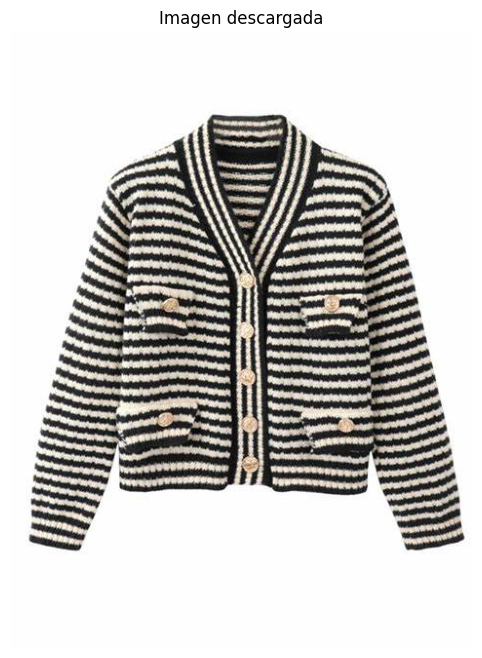

In [ ]:
descargar_imagen("https://th.bing.com/th/id/OIP.kkE-3xIe8JkzV1s_BhE6QgHaJ4?rs=1&pid=ImgDetMain")

In [ ]:
imagen_descargada = cargar_imagen("/kaggle/working/image_descargada.jpg")

1/1 [==============================] - 1s 930ms/step


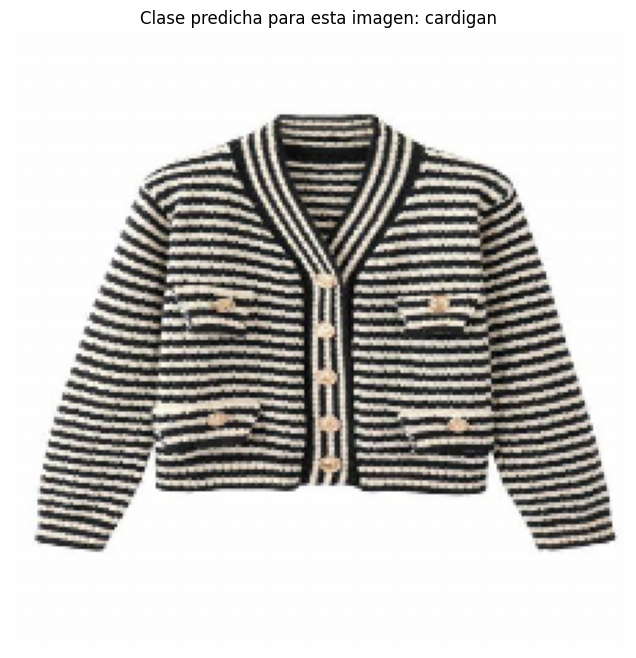

In [ ]:
prediccion(imagen_descargada)